In [1]:
import os
import cv2
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
from augraphy import *
from tqdm.notebook import tqdm
from PIL import Image

In [2]:
train_folder = "/data/datasets/images/train"

In [3]:
os.listdir("/data/datasets/")

['032.공공행정문서_OCR',
 'train',
 'images',
 'jsons',
 'sample_submission.csv',
 'train.tgz']

In [4]:
random.seed(42)
"""
path = "./datasets/images/train/"
image_li = os.listdir(path)
"""

ink_phase = [

    InkBleed(
        intensity_range=(0.5, 0.6),
        kernel_size=random.choice([(5, 5), (3, 3)]),
        severity=(0.2, 0.4),
        p=0.33,
    ),
    LightingGradient(
        light_position=None,
        direction=None,
        max_brightness=255,
        min_brightness=0,
        mode="gaussian",
        transparency=0.3
    ),
    OneOf(
        [
            InkShifter(
                text_shift_scale_range=(18, 23),
                text_shift_factor_range=(1, 2),
                text_fade_range=(0, 2),
                blur_kernel_size=(3, 3),
                blur_sigma=0,
                noise_type="random",
            ),
            BleedThrough(
                intensity_range=(0.1, 0.3),
                color_range=(30, 224),
                ksize=(17, 17),
                sigmaX=1,
                alpha=random.uniform(0.1, 0.2),
                offsets=(10, 20),
            ),
        ],
        p=1.0,
    ),
]

paper_phase = [
    AugmentationSequence(
        [
            BrightnessTexturize(
                texturize_range=(0.9, 0.99),
                deviation=0.1,
                p = 0.33
            ),
        ],
    ),
]

post_phase = [
    Jpeg(               # jpg 파일 압축 효과 재현
        quality_range=(5, 15),
        p=0.33,
    ),


    Scribbles(
        scribbles_type="lines",
        scribbles_ink="pen",
        scribbles_location="random",
        scribbles_size_range=(250, 450),
        scribbles_count_range=(2, 3),
        scribbles_thickness_range=(1, 3),
        scribbles_brightness_change=[32, 64, 128],
        scribbles_lines_stroke_count_range=(1, 6),
        p = 0.33
    ),


    Faxify(
        scale_range=(0.3, 0.6),
        monochrome=random.choice([0, 1]),
        monochrome_method="random",
        monochrome_arguments={},
        halftone=random.choice([0, 1]),
        invert=1,
        half_kernel_size=random.choice([(1, 1), (2, 2)]),
        angle=(0, 360),
        sigma=(1, 3),
        p=0.33,
    ),
]
pipeline = AugraphyPipeline(ink_phase=ink_phase, paper_phase=paper_phase, post_phase=post_phase)

In [5]:
image = cv2.imread(f"{train_folder}/drp.en_ko.in_house.selectstar_002128.jpg")

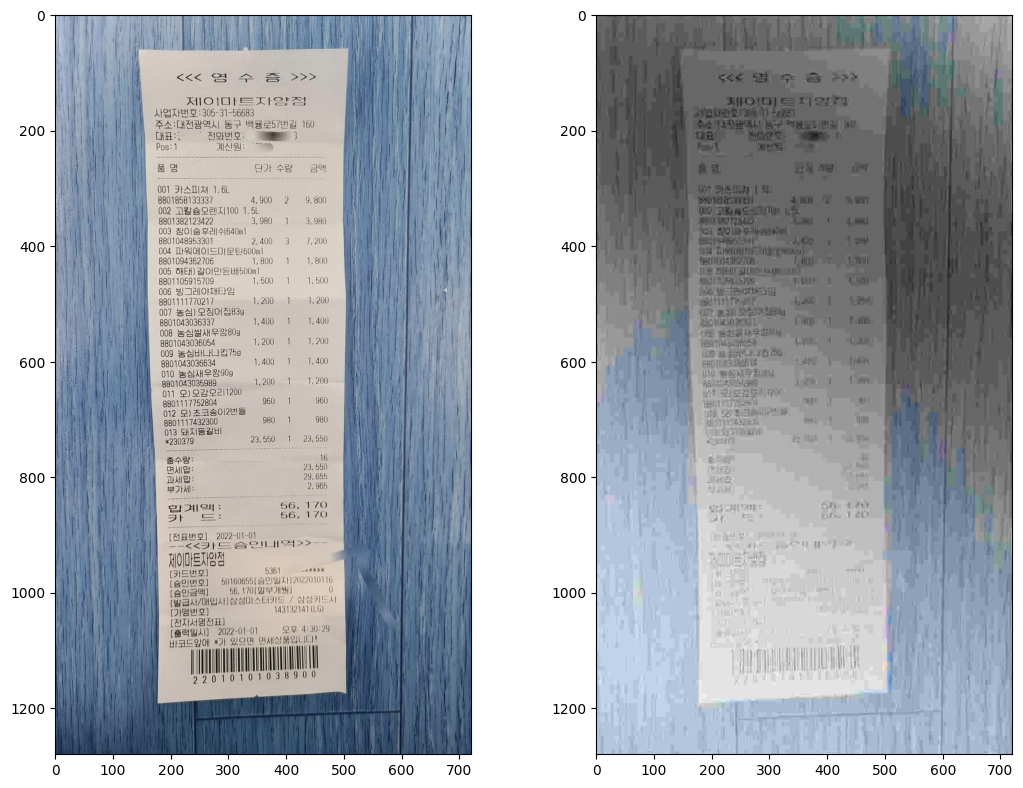

In [6]:
fig,axs = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(6.4 * 2, 4.8 * 2)
axs[0].imshow(image)
axs[1].imshow(pipeline(image))

In [7]:
aug_image = pipeline(image)

In [8]:
pil_image = Image.fromarray(aug_image)

In [9]:
pil_image.save("./temp.jpg")

In [10]:
file_names = os.listdir(train_folder)

In [11]:
file_names[0].replace(".jpg","")

'5350109-2000-0002-1363'

In [12]:
for file_name in tqdm(file_names):
    name = file_name.replace(".jpg","")
    image = cv2.imread(f"{train_folder}/{file_name}")
    aug_image = pipeline(image)
    pil_image = Image.fromarray(aug_image)
    pil_image.save(f"{train_folder}/{name}_augmented01.jpg")

  0%|          | 0/37406 [00:00<?, ?it/s]